**Zadatak 1**

In [3]:
# a)

from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
# b)

print("Trening: ", train_data.shape)
print("Test: ", test_data.shape)

print("Broj atributa: ", train_data.shape[1])

Trening:  (404, 13)
Test:  (102, 13)
Broj atributa:  13


In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
import math
import matplotlib.pyplot as plt

In [6]:
# c)

min_values = np.min(train_data, axis=0)
max_values = np.max(train_data, axis=0)

min_target = np.min(train_targets)
max_target = np.max(train_targets)

print("Opseg vrijednosti za svaki atribut u skupu podataka:")
for i in range(len(min_values)):
    print(f"{i+1}. atribut: min={min_values[i]}, max={max_values[i]}")

print("\nOpseg vrijednosti za ciljne vrijednosti:")
print(f"min={min_target}, max={max_target}")

Opseg vrijednosti za svaki atribut u skupu podataka:
1. atribut: min=0.00632, max=88.9762
2. atribut: min=0.0, max=100.0
3. atribut: min=0.46, max=27.74
4. atribut: min=0.0, max=1.0
5. atribut: min=0.385, max=0.871
6. atribut: min=3.561, max=8.725
7. atribut: min=2.9, max=100.0
8. atribut: min=1.1296, max=10.7103
9. atribut: min=1.0, max=24.0
10. atribut: min=188.0, max=711.0
11. atribut: min=12.6, max=22.0
12. atribut: min=0.32, max=396.9
13. atribut: min=1.73, max=37.97

Opseg vrijednosti za ciljne vrijednosti:
min=5.0, max=50.0


In [8]:
# d)

scaler = MinMaxScaler()
scaler.fit(train_data)

train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [10]:
# e)

def model_mreze(br_atributa):

  model = models.Sequential()

  model.add(layers.Dense(64, activation='relu', input_shape=(br_atributa,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))

  return model

model = model_mreze(train_data.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# f)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 342.4167 - mae: 15.0341 - val_loss: 42.9043 - val_mae: 5.1915
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 64.2476 - mae: 5.8168 - val_loss: 19.7899 - val_mae: 3.2975
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 42.9793 - mae: 4.7369 - val_loss: 20.5211 - val_mae: 3.4346
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 28.0473 - mae: 3.7738 - val_loss: 19.6643 - val_mae: 3.2175
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.6662 - mae: 3.7150 - val_loss: 21.0930 - val_mae: 3.2429
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.0441 - mae: 3.3818 - val_loss: 19.0664 - val_mae: 3.1174
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.1255 - mae: 3.1085 - val_loss: 19.1014 - val_mae: 3.1303
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.8684 - mae: 3.1868 - val_loss: 18.9161 - val_mae: 3.2618
Epoch 9/100
363/363 ━━━━━━━━━━

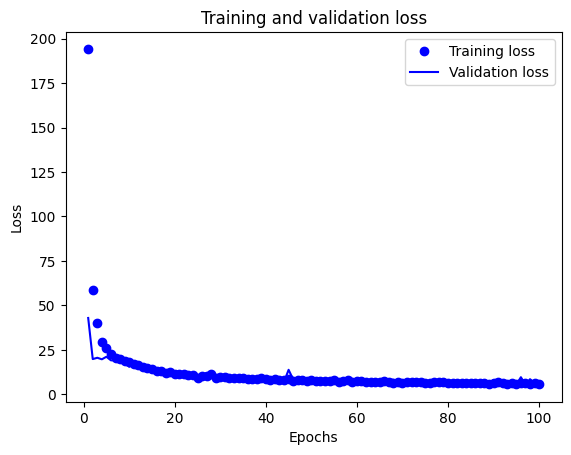

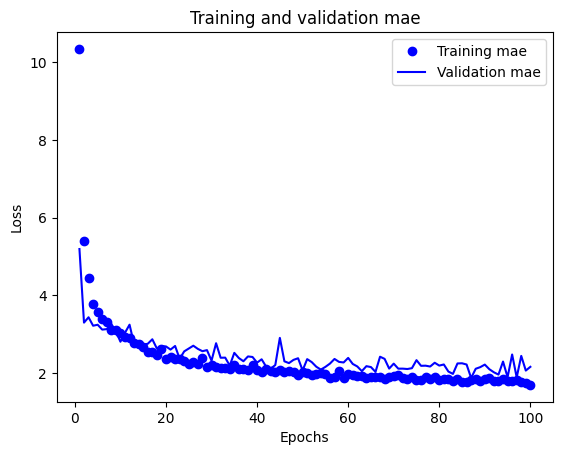

In [13]:
# g)

history = model.fit(train_data_scaled, train_targets, epochs=100, batch_size=1, validation_split=0.1)

acc = history.history['mae']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()
acc_values = history.history['mae']
val_acc_values = history.history['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

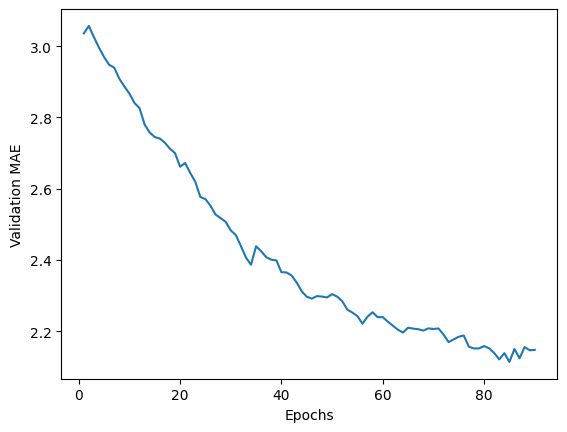

In [14]:
# h)

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
       previous = smoothed_points[-1]
       smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
  return smoothed_points
mae_history = history.history['val_mae']

smooth_mae_history = smooth_curve(mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 306.5054 - mae: 14.0683 - val_loss: 26.8016 - val_mae: 4.2578
Epoch 2/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55.1773 - mae: 4.9221 - val_loss: 18.4238 - val_mae: 3.3078
Epoch 3/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 37.5756 - mae: 4.3942 - val_loss: 18.3016 - val_mae: 3.2330
Epoch 4/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26.0347 - mae: 3.5306 - val_loss: 19.8564 - val_mae: 3.2631
Epoch 5/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 28.4969 - mae: 3.5175 - val_loss: 20.6890 - val_mae: 3.4319
Epoch 6/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.8762 - mae: 3.2026 - val_loss: 17.0169 - val_mae: 2.9083
Epoch 7/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.0808 - mae: 3.0629 - val_loss: 18.2616 - val_mae: 3.1349
Epoch 8/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.1530 - mae: 2.8450 - val_loss: 18.4597 - val_mae: 3.1388
Epoch 9/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 1

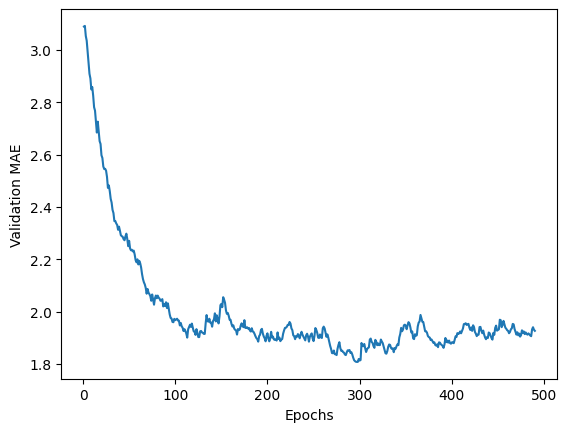

In [15]:
# i)
model = model_mreze(train_data.shape[1])
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
history = model.fit(train_data_scaled, train_targets, epochs=500, batch_size=1, validation_split=0.1)

mae_history = history.history['val_mae']
smooth_mae_history = smooth_curve(mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [16]:
# j)

results = model.evaluate(test_data,test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6774330.5000 - mae: 2413.3665 
